# Customer purchase behavior - Electronic Sales Data

---

#### Customer purchasing behavior and demographics in the electronics market.

---

### About Dataset

**Description:**

This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors.

**Key Features:**

    - Customer ID: Unique identifier for each customer.
    - Age: Age of the customer (numeric)
    - Gender: Gender of the customer (Male or Female)
    - Loyalty Member: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)
    - Product Type: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)
    - SKU: a unique code for each product.
    - Rating: Customer rating of the product (1-5 stars) (Should have no Null Ratings)
    - Order Status: Status of the order (Completed, Cancelled)
    - Payment Method: Method used for payment (e.g., Cash, Credit Card, Paypal)
    - Total Price: Total price of the transaction (numeric)
    - Unit Price: Price per unit of the product (numeric)
    - Quantity: Number of units purchased (numeric)
    - Purchase Date: Date of the purchase (format: YYYY-MM-DD)
    - Shipping Type: Type of shipping chosen (e.g., Standard, Overnight, Express)
    - Add-ons Purchased: List of any additional items purchased (e.g., Accessories, Extended Warranty)
    - Add-on Total: Total price of add-ons purchased (numeric)

NOTE: The original generated data had exactly 50% counts for both gender and loyalty. This has been adjusted for a more realistic distribution. Additionally, all customer information is consistent across all their orders.

**Data Stats:**

* Total Rows: 20,000
* Time Period: September 2023 to September 2024
* Product Types: Includes various electronics such as Smartphones, Laptops, Tablets, and Smartwatches.

**Disclaimer:**

This dataset is generated. It does not represent real-world transactions or actual customer data.
All values, including customer IDs, ages, product types, and ratings, are fictitious and created for the purpose of analysis and modeling.

---

In [10]:
# Libraries and Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
sales_data = pd.read_csv('Electronic-Sales-Sep2023-Sep2024.csv')

In [5]:
# Preview Data
sales_data.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [39]:
print(sales_data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total'],
      dtype='object')


In [6]:
# Descriptive Statistics
sales_data.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [8]:
# Check for missing values
# sales_data.isnull()

In [35]:
# Convert Payment Method from string to float using onehot encoding.
# Isolate payment methods column.
payment_methods = sales_data['Payment Method']
# Handle Missing Values
payment_methods = payment_methods.fillna('Unknown')
# Standardize the entries (Paypal vs paypal)
payment_methods = payment_methods.str.lower()
# Encode for visualiztion.
payment_methods_encoded = pd.get_dummies(payment_methods)
# Counts of each payment method
payment_counts = payment_methods_encoded.sum()
# Option to add these one-hot encoded columns back to the original DataFrame.
# sales_data = pd.concat([sales_data, payment_methods_encoded], axis=1)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'bank transfer'),
  Text(1, 0, 'cash'),
  Text(2, 0, 'credit card'),
  Text(3, 0, 'debit card'),
  Text(4, 0, 'paypal')])

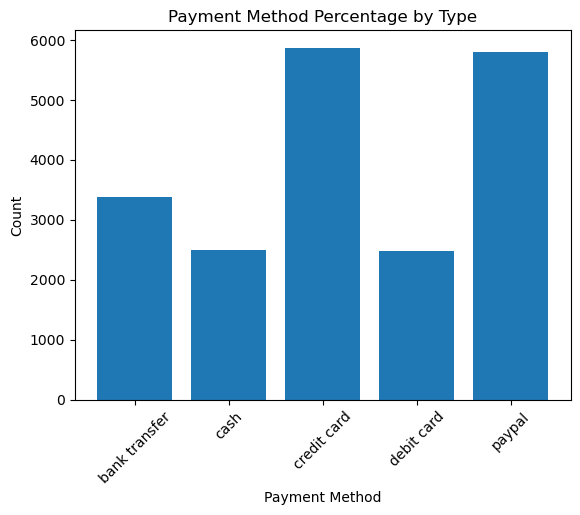

In [38]:
# Step 5: Plot the bar chart
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Payment Method Count by Type')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

We can see that credit cards and paypal are the most popular forms of payment. Bank transfer and debit card payments are also electronic.

Text(0, 0.5, 'Frequency')

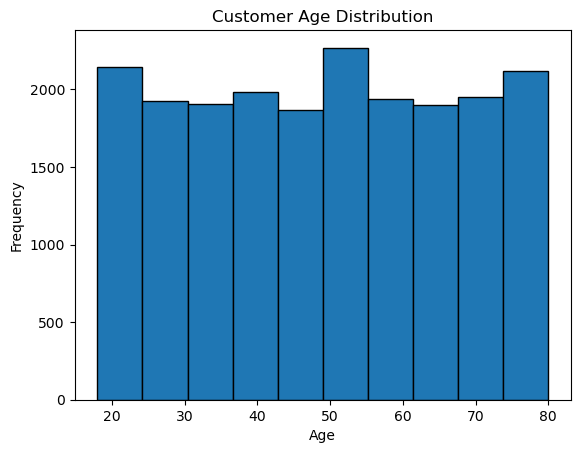

In [53]:
# Customer age distribution
plt.hist(sales_data['Age'], bins=10, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Customer age is evenly distributed. Leading groups are ages 18-23 and 49-55.

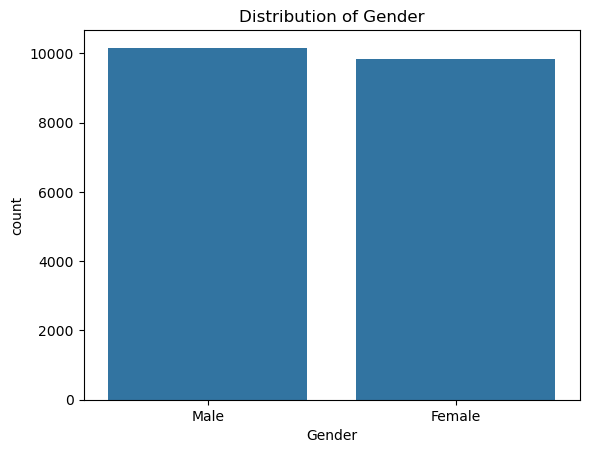

In [56]:
# Check distribution of gender
sns.countplot(x='Gender', data=sales_data)
plt.xlabel('Gender')
plt.title('Distribution of Gender')
plt.show()
plt.close()

In [54]:
customers_male = sales_data[sales_data['Gender'] == 'Male']
customers_female = sales_data[sales_data['Gender'] == 'Female'] 

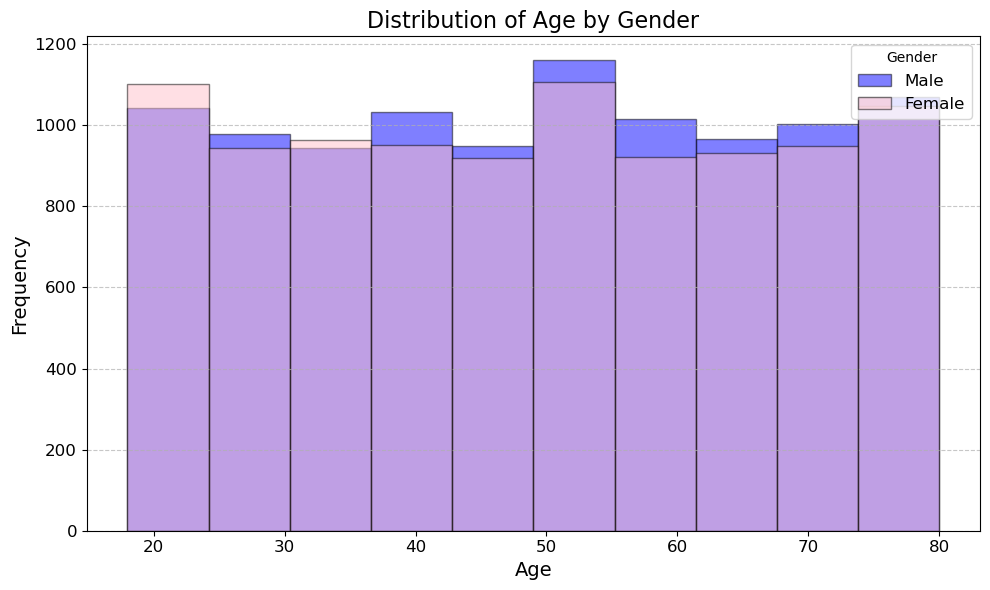

In [133]:
# Improved Histogram of Age by Gender
plt.figure(figsize=(10, 6))
plt.hist(sales_data[sales_data['Gender'] == 'Male']['Age'], bins=10, alpha=0.5, label='Male', color='blue', edgecolor='black')
plt.hist(sales_data[sales_data['Gender'] == 'Female']['Age'], bins=10, alpha=0.5, label='Female', color='pink', edgecolor='black')
plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

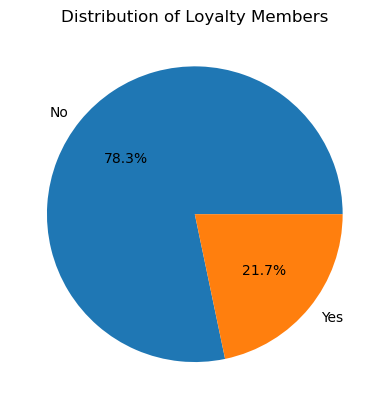

In [76]:
# Get the counts of loyalty status
loyalty_counts = sales_data['Loyalty Member'].value_counts()

# Plot the pie chart
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loyalty Members')
plt.show()



In [77]:
# Product type vs Order Status (Completed or Cancelled)
sales_data.value_counts('Product Type')

Product Type
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: count, dtype: int64

In [81]:
sales_data['Order Status Encoded'] = sales_data['Order Status'].map({'completed': 1, 'cancelled': 0})
order_status = sales_data['Order Status Encoded']

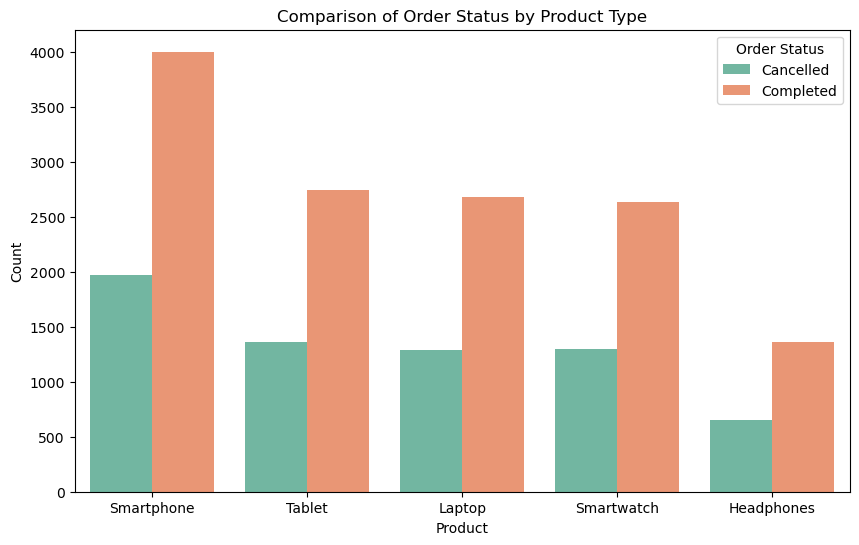

In [82]:
# Step 1: Plot using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data, x='Product Type', hue='Order Status', palette='Set2')

# Step 2: Customize the plot
plt.title('Comparison of Order Status by Product Type')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Order Status')

# Step 3: Display the plot
plt.show()


Smart phones have the highest amount of cancellations. Is there a correlation between price and cancellation?

In [112]:
# Step 1: Correctly encode 'Order Status' into numerical values
sales_data['Order Status Encoded'] = sales_data['Order Status'].map({'Completed': 0, 'Cancelled': 1})

# Step 2: Check if there are any missing values after encoding
print(sales_data['Order Status Encoded'].isnull().sum())

# Step 3: Drop rows with missing values in 'Total Price' and 'Order Status Encoded'
sales_data_clean = sales_data.dropna(subset=['Total Price', 'Order Status Encoded'])

# Step 4: Calculate the correlation between 'Total Price' and 'Order Status Encoded'
correlation = sales_data_clean['Total Price'].corr(sales_data_clean['Order Status Encoded'])

# Step 5: Print the correlation result
print("Correlation between Total Price and Order Cancellations:", correlation)


0
Correlation between Total Price and Order Cancellations: 0.003595153973419686


Interpretation:

    Correlation Value: A value of 0.0036 suggests a very weak correlation, meaning that changes in the total price do not have a significant impact on the likelihood of an order being cancelled.
    Impact on Analysis: Since the correlation is close to zero, it implies that the price of a product does not seem to be a factor in determining whether customers cancel their orders. This could mean that other factors (such as product type, customer experience, or loyalty status) might have a stronger influence.

Next Steps:

    Explore Other Variables:
        Investigate other features, such as Product Type, Customer Age, Loyalty Status, or Payment Method, to see if they have a more meaningful relationship with cancellations.

    Visual Analysis:
        Consider creating box plots or histograms to visually inspect how Total Price varies between completed and cancelled orders. This might help identify patterns that are not obvious in the correlation calculation.

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/3315151775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Status', y='Total Price', data=sales_data, palette='Set3')


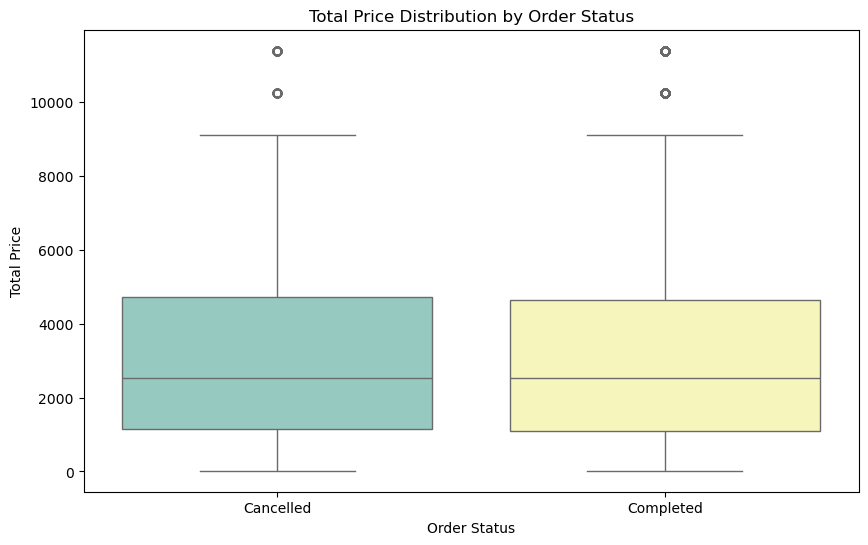

In [113]:
# Boxplot for Total Price vs Order Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order Status', y='Total Price', data=sales_data, palette='Set3')
plt.title('Total Price Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Price')
plt.show()

In [138]:
# Check Other Correlations:
# Ensure 'Order Status Encoded' is numeric
sales_data['Order Status Encoded'] = pd.to_numeric(sales_data['Order Status Encoded'], errors='coerce')

# Calculate the correlation matrix using only numeric columns
correlation_matrix = sales_data.select_dtypes(include='number').corr()

# Display the correlation values for 'Order Status Encoded'
correlation_with_order_status = correlation_matrix.get('Order Status Encoded', 'Column not found')
print(correlation_with_order_status)
# Correlation matrix for the dataset
correlation_matrix = sales_data.corr()
print(correlation_matrix['Order Status Encoded'])

Customer ID            -0.001435
Age                     0.001633
Rating                 -0.004182
Total Price             0.003595
Unit Price              0.003422
Quantity                0.001183
Add-on Total            0.000876
Order Status Encoded    1.000000
Name: Order Status Encoded, dtype: float64


ValueError: could not convert string to float: 'Male'

Key Observations:

    Customer ID, Age, Rating, Total Price, Unit Price, Quantity, Add-on Total: All have correlation coefficients close to zero with Order Status Encoded. This suggests that none of these factors have a strong linear influence on whether an order is cancelled or not.
        The highest correlation (Total Price: 0.0036) is still extremely weak.
        Rating has a slightly negative correlation (-0.0042), but again, it's too small to be meaningful.

Interpretation:

    Since all correlations are near zero, it indicates that none of these features seem to have a significant linear impact on order cancellations. There may be non-linear relationships that aren't captured by correlation analysis.
    Other Factors: The lack of correlation suggests that other non-obvious factors could be contributing to cancellations, or that the features you've analyzed may not be the primary determinants of order cancellation.

Possible Next Steps:

    Explore Non-linear Relationships:
        Use visual analysis techniques like scatter plots, box plots, or pair plots to visually check for non-linear relationships between the features and cancellations.

    Feature Engineering:
        Consider creating new features from the existing ones, like interaction terms between Unit Price and Quantity, or calculating the average customer rating for each product type. Such derived features could provide more insight into the factors affecting cancellations.

    Classification Analysis:
        Instead of relying on simple correlation, try using a classification model (e.g., logistic regression, decision tree) to predict cancellations based on other features. The feature importance from these models can give better insight into which factors contribute the most to cancellations.

---


---

Part 2

---

In [130]:
# Logistic Regression for Cancellations:

# Using a logistic regression model to see if it identifies any significant predictors for cancellations:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Select features and target
features = ['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']
X = sales_data[features]
y = sales_data['Order Status Encoded']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a logistic regression model with scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      2690
           1       0.32      0.41      0.36      1310

    accuracy                           0.52      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.55      0.52      0.53      4000



Feature Importance: Logistic regression coefficients can tell us how each feature affects the likelihood of cancellations.
    Classification Report: Evaluate the model’s performance, which will give you an idea if these features provide any predictive power for cancellations.

In [ ]:
# Step 1: Plot using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data, x='Product Type', hue='Order Status', palette='Set2')

# Step 2: Customize the plot
plt.title('Comparison of Order Status by Product Type')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Order Status')

# Step 3: Display the plot
plt.show()

In [ ]:
# Examine products purchased.
# What is the most popular product and who is buying it?


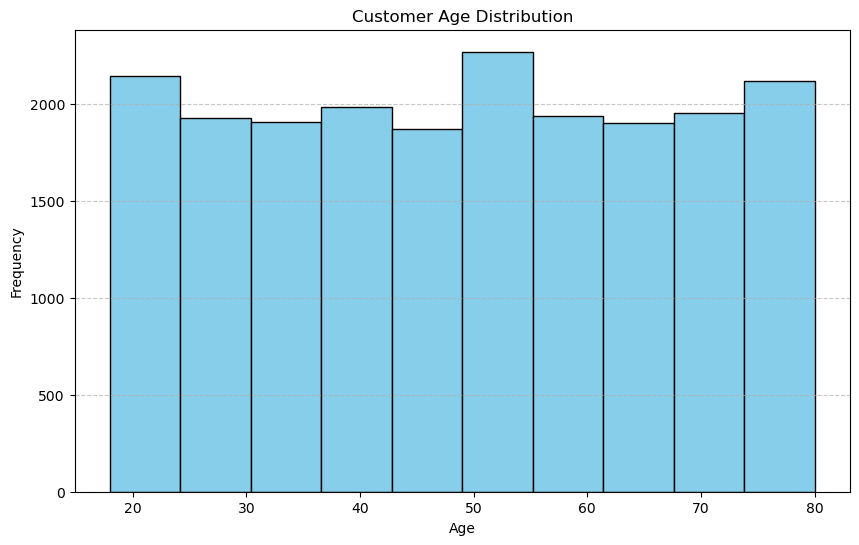

In [106]:
# 1. Analyze Customer Age Distribution
# The first aspect we can analyze is the age distribution to understand which age groups are more represented among customers.

# Plot Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

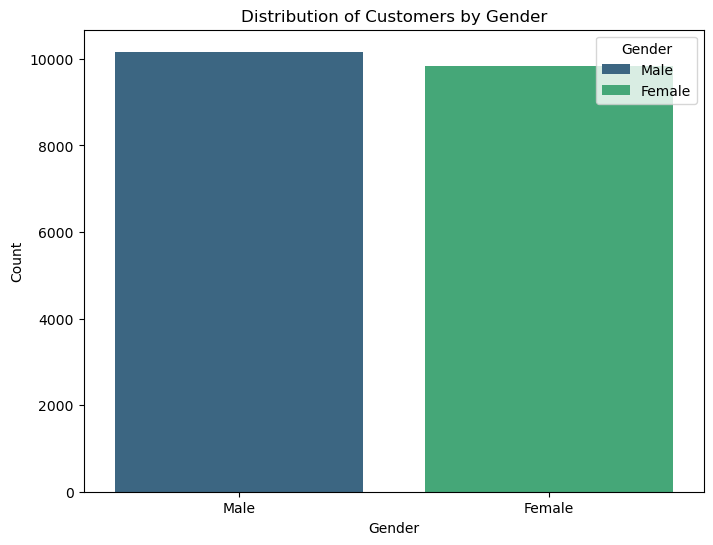

In [129]:
# 2. Analyze Customer Gender Distribution

# We can then analyze the distribution of genders to see if there's an even split between males and females.

    
# Plot Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=sales_data, hue='Gender', palette='viridis')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

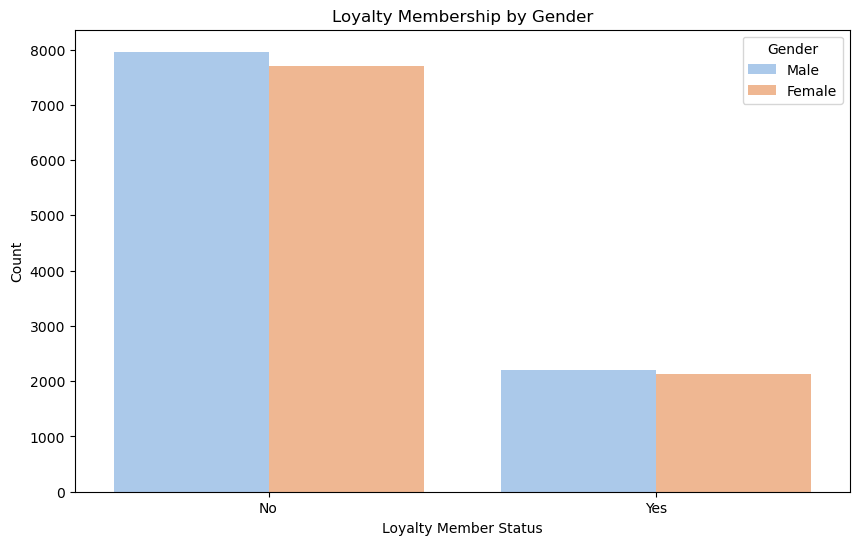

In [108]:
# 3. Analyze Loyalty Membership by Gender

# Explore the loyalty status by gender to understand if there is a difference between males and females in joining the loyalty program.

# Plot Loyalty Membership Status by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Loyalty Member', hue='Gender', data=sales_data, palette='pastel')
plt.title('Loyalty Membership by Gender')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Count')
plt.show()

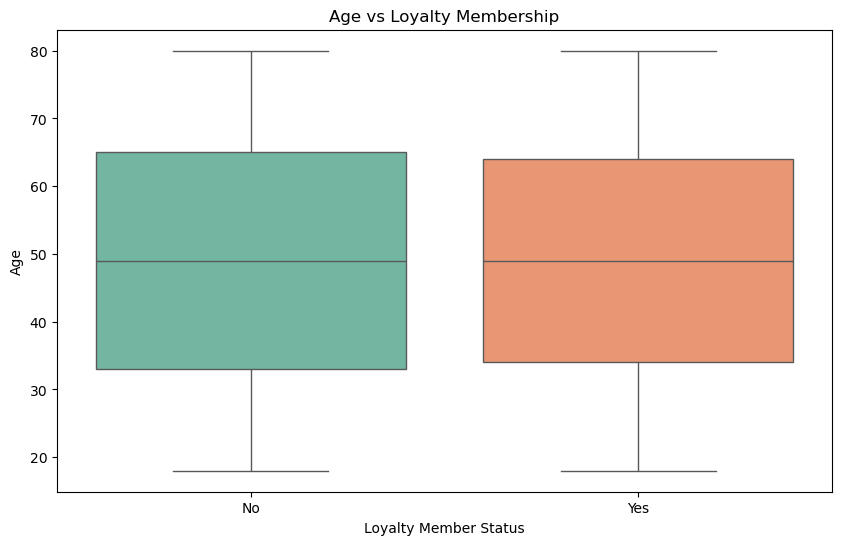

In [117]:
# 4. Analyze Age vs. Loyalty Membership

# Explore how age affects loyalty membership. For instance, are older customers more likely to join the loyalty program?

# Boxplot for Age vs. Loyalty Membership
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty Member', y='Age', data=sales_data, hue='Loyalty Member', palette='Set2')
plt.title('Age vs Loyalty Membership')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Age')
plt.show()

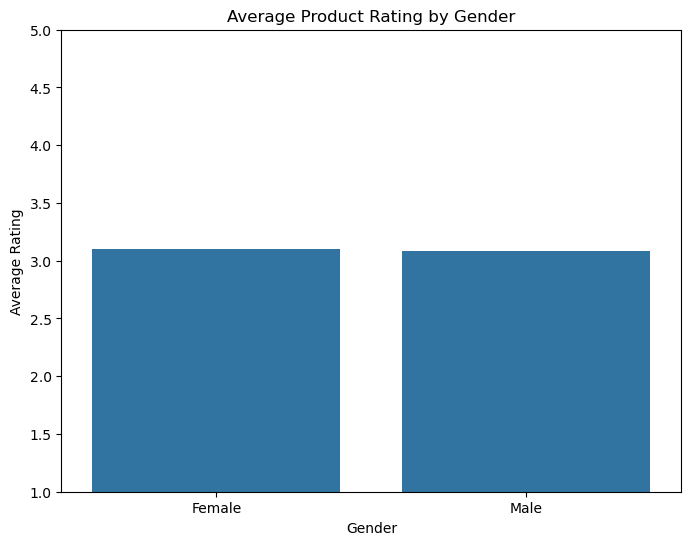

In [124]:
# 5. Analyze Relationship Between Gender and Average Rating Given

# Examine whether there is a difference in product ratings based on gender. For example, do male or female customers rate products differently?

# Calculate average ratings by gender
average_rating_gender = sales_data.groupby('Gender')['Rating'].mean()

# Plot Average Rating by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating_gender.index, y=average_rating_gender.values)
plt.title('Average Product Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.ylim(1, 5)  # Ratings are between 1 and 5
plt.show()

Summary of Insights:

    Age Distribution: The histogram shows which age groups are the most common among the customer base.

    Gender Distribution: The count plot indicates the proportion of male vs. female customers.

    Loyalty Membership: The count plot for loyalty by gender helps identify if there's a significant gender difference in loyalty membership.
    
    Age vs. Loyalty: The boxplot gives insights into whether younger or older customers are more likely to join the loyalty program.
    
    Average Rating by Gender: The bar plot indicates if there is a significant difference between male and female customers in terms of product ratings.

From the data, Smartphones are making the most money, with a total revenue of $21,516,754.69, followed by Smartwatches ($14,036,273.06), Laptops ($12,296,239.97), and Tablets ($11,712,000.41). Headphones are at the bottom, generating $4,041,400.24.
Next Steps for Analysis:

    Identify the Customer Demographics for the Best-Selling Product (Smartphones):

        Who are the primary buyers of smartphones? Let's explore their age, gender, loyalty status, and other demographics.

    Explore Marketing Opportunities:

        Once we know the demographics of the primary buyers, we can determine if there is a particular group to focus marketing efforts on.

Now we will proceed with analyzing the demographics for Smartphone buyers to understand the target group. ​

​
Demographic Insights for Smartphone Buyers:

    Gender Distribution:
        The buyers are almost evenly split between Male (2998 buyers) and Female (2980 buyers), indicating that both genders are equally interested in purchasing smartphones.

    Age Distribution:
        The average age of smartphone buyers is 49 years.
        The age range is quite broad, from 18 to 80 years, with:
            25% of buyers aged 34 years or younger.
            50% of buyers aged between 34 and 64 years.
            25% of buyers aged 64 years or older.

    Loyalty Membership:
        The majority of smartphone buyers are not loyalty members (4726 buyers).
        Only 1252 buyers are part of the loyalty program.

Insights for Marketing:

    Age Group: The target age group for smartphones is middle-aged adults (34 to 64 years), but there is significant interest across all age ranges.

    Gender: Marketing efforts can be equally focused on both males and females, as the interest is balanced.
    
    Loyalty Program: Since most buyers are not part of the loyalty program, there is an opportunity to incentivize these customers to join. Offering discounts or perks on future purchases could be a strategy to boost loyalty membership among smartphone buyers.

Next Steps:

    Visualize the Findings: We can create some visualizations to summarize the demographics of smartphone buyers.
    Target Group Identification: Based on these findings, we could create a more targeted marketing campaign.

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/393392424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=smartphone_data, palette='viridis')


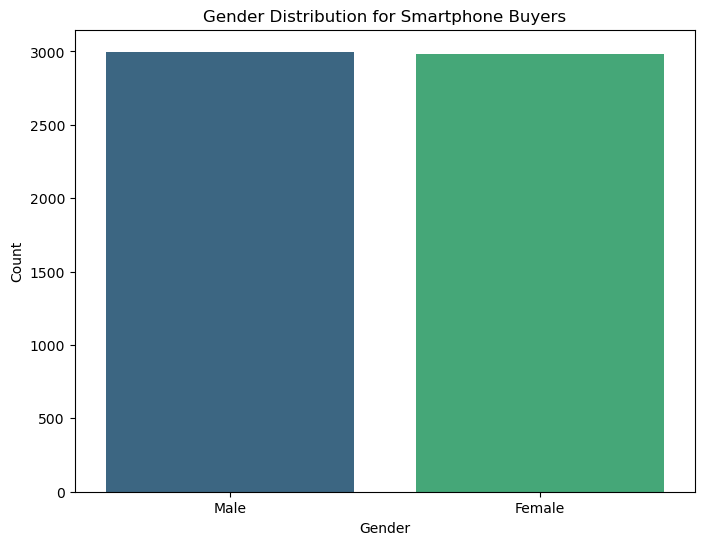

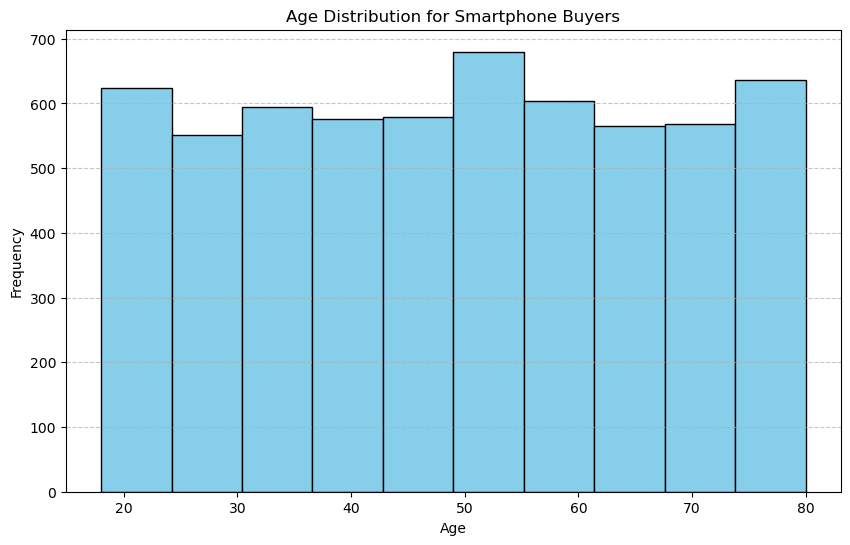

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/393392424.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loyalty Member', data=smartphone_data, palette='pastel')


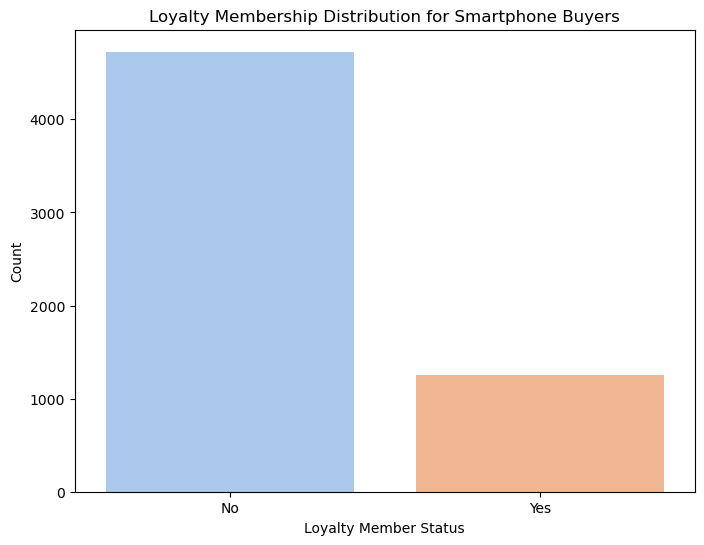

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/393392424.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loyalty Member', y='Age', data=smartphone_data, palette='Set2')


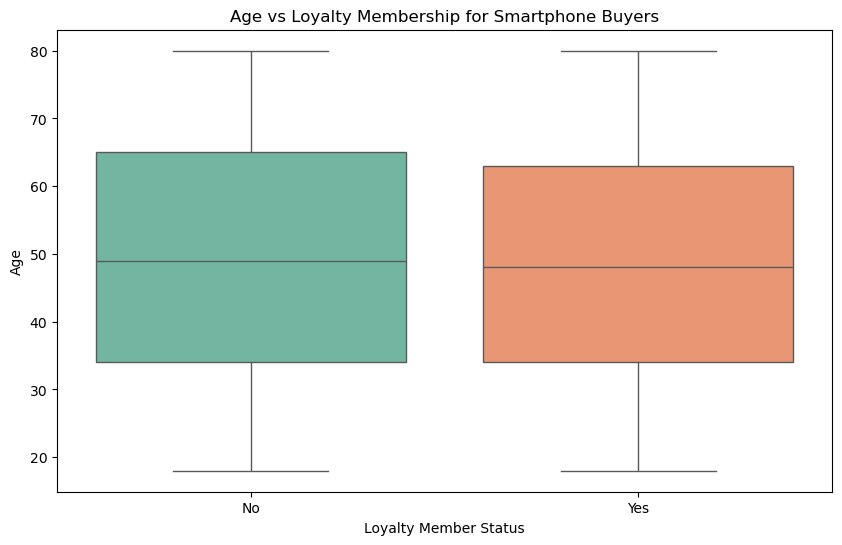

In [132]:
#Visualization of demographics for Smartphone buyers
# Assuming sales_data is already loaded
# Step 1: Filter data for Smartphone purchases
smartphone_data = sales_data[sales_data['Product Type'] == 'Smartphone']
# Gender Distribution for Smartphone Buyers
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=smartphone_data, palette='viridis')
plt.title('Gender Distribution for Smartphone Buyers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution for Smartphone Buyers
plt.figure(figsize=(10, 6))
plt.hist(smartphone_data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Age Distribution for Smartphone Buyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Loyalty Membership Distribution for Smartphone Buyers
plt.figure(figsize=(8, 6))
sns.countplot(x='Loyalty Member', data=smartphone_data, palette='pastel')
plt.title('Loyalty Membership Distribution for Smartphone Buyers')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Count')
plt.show()

# Age vs Loyalty Membership for Smartphone Buyers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty Member', y='Age', data=smartphone_data, palette='Set2')
plt.title('Age vs Loyalty Membership for Smartphone Buyers')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Age')
plt.show()


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/3823451512.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M', on='Purchase Date')['Total Price'].sum()


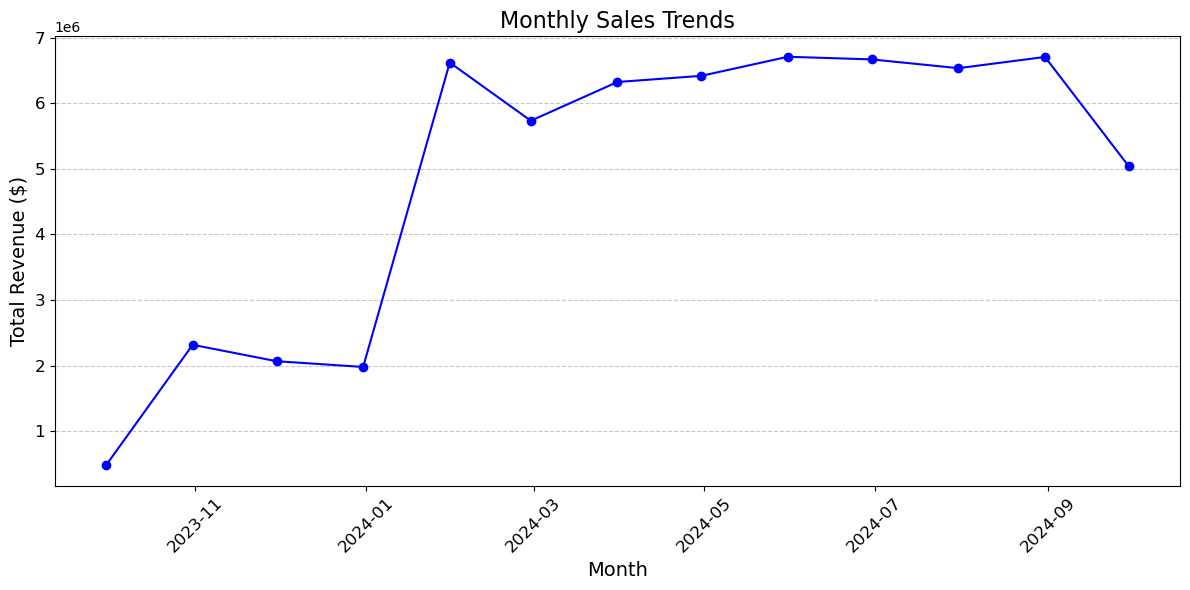

In [139]:
# Step 1: Filter data for Smartphone purchases
smartphone_data = sales_data[sales_data['Product Type'] == 'Smartphone']

# Sales Trends Analysis
# Convert 'Purchase Date' to datetime format
sales_data['Purchase Date'] = pd.to_datetime(sales_data['Purchase Date'])

# Group sales data by month and calculate total revenue
monthly_sales = sales_data.resample('M', on='Purchase Date')['Total Price'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/2728910730.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=smartphone_data, palette='viridis')


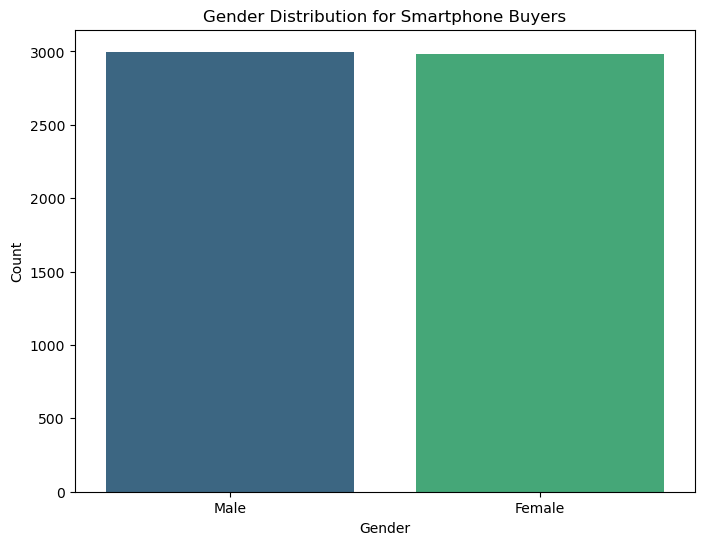

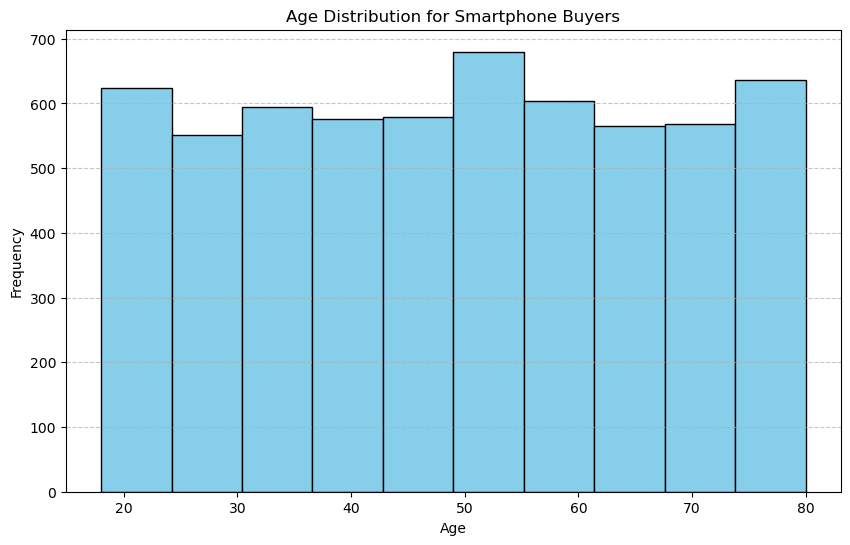

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/2728910730.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loyalty Member', data=smartphone_data, palette='pastel')


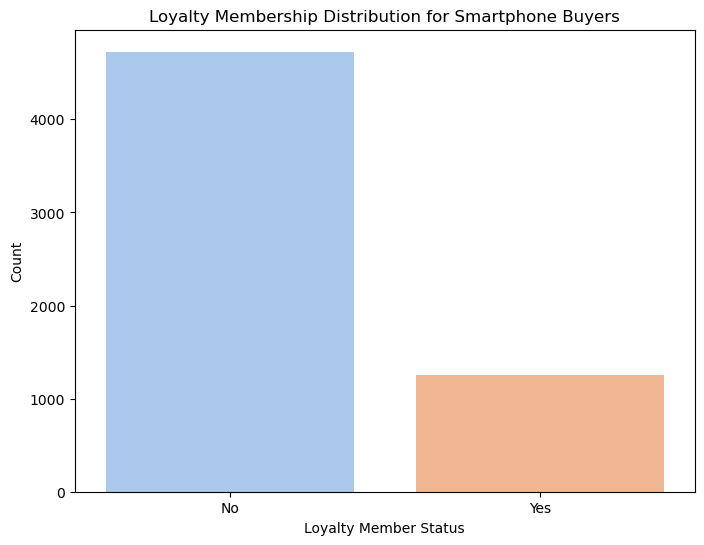

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/2728910730.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loyalty Member', y='Age', data=smartphone_data, palette='Set2')


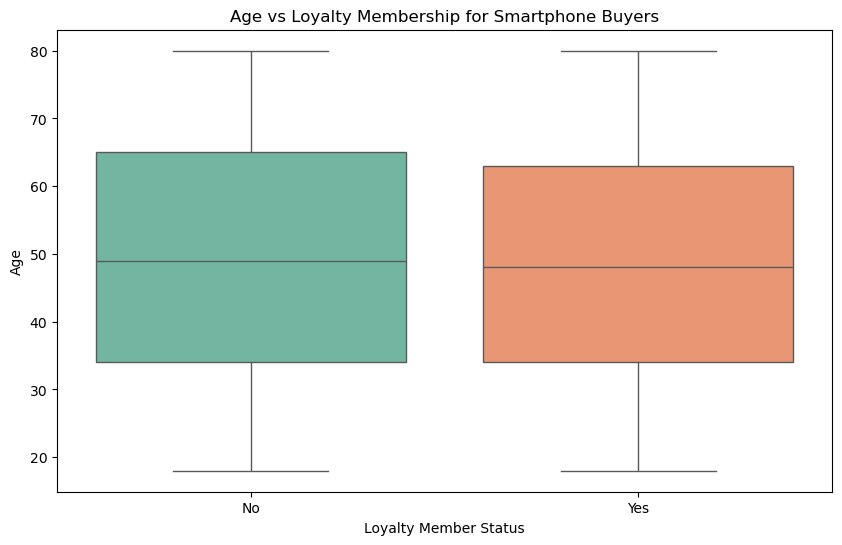

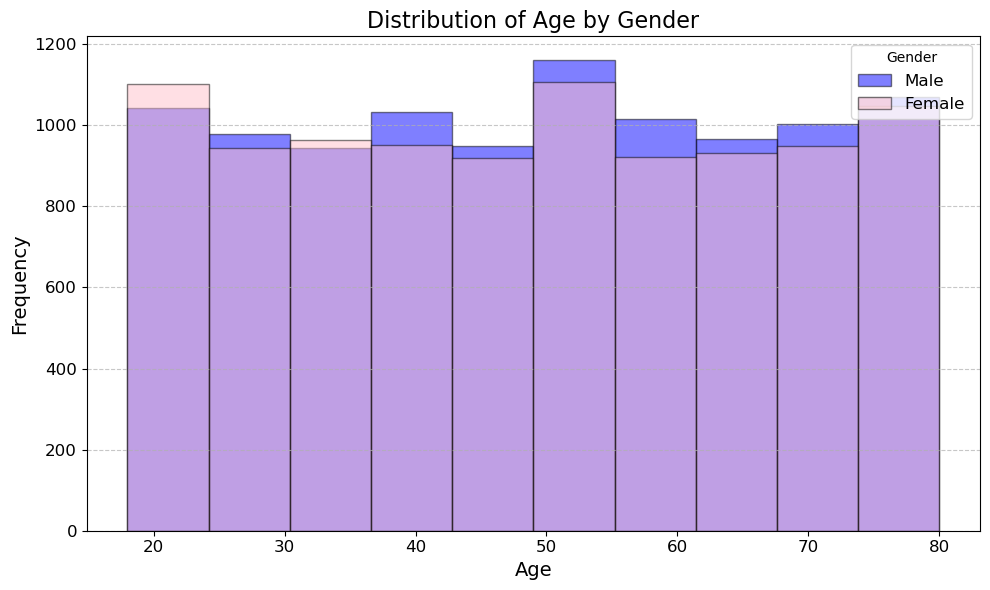

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/2728910730.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M', on='Purchase Date')['Total Price'].sum()


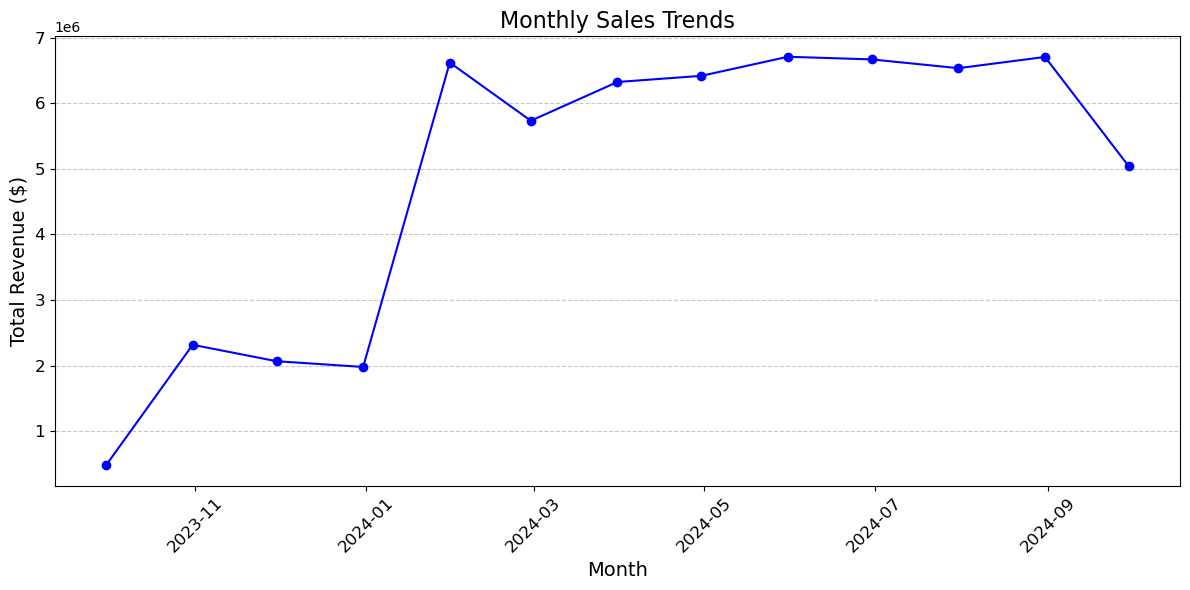

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_57253/2728910730.py:82: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  product_monthly_sales = sales_data.groupby(['Product Type', pd.Grouper(key='Purchase Date', freq='M')])['Total Price'].sum().reset_index()


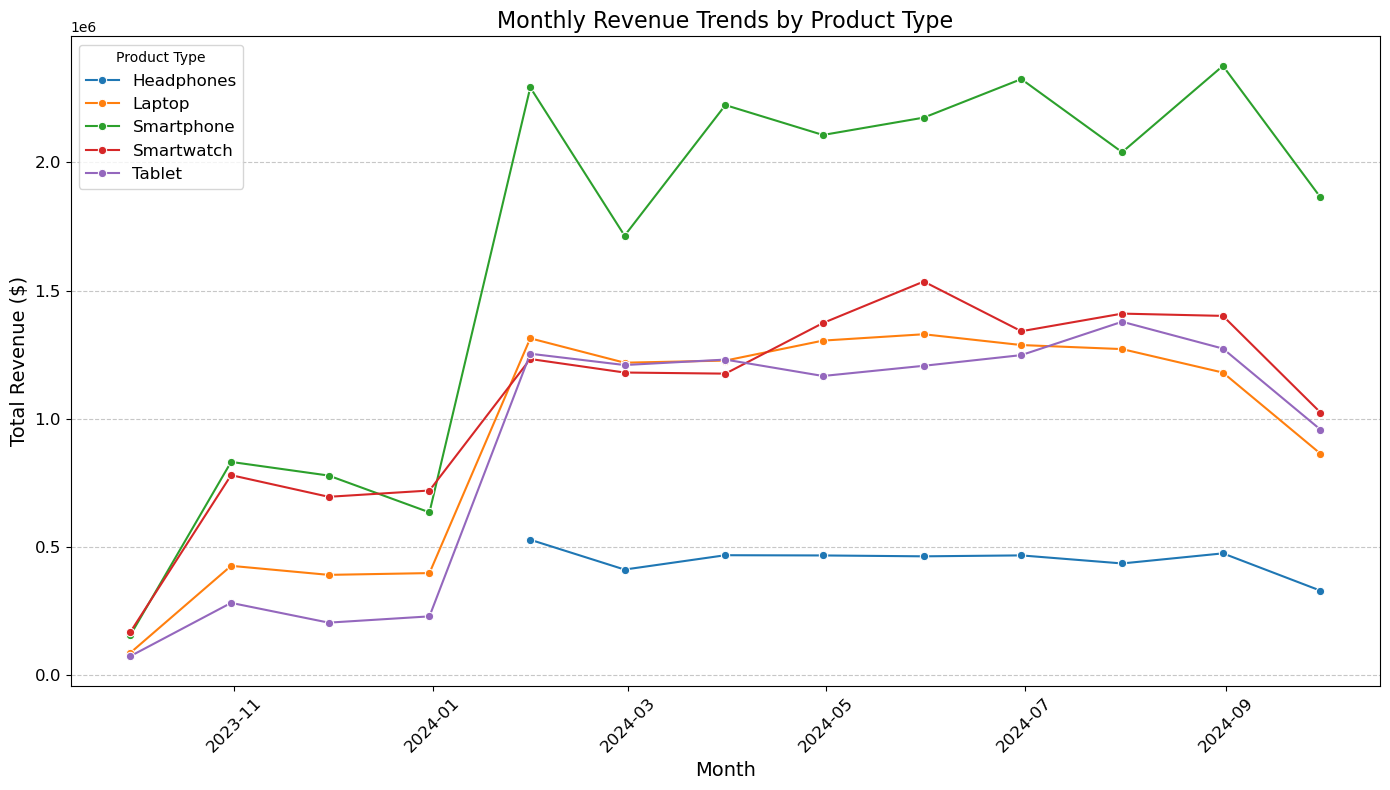

/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


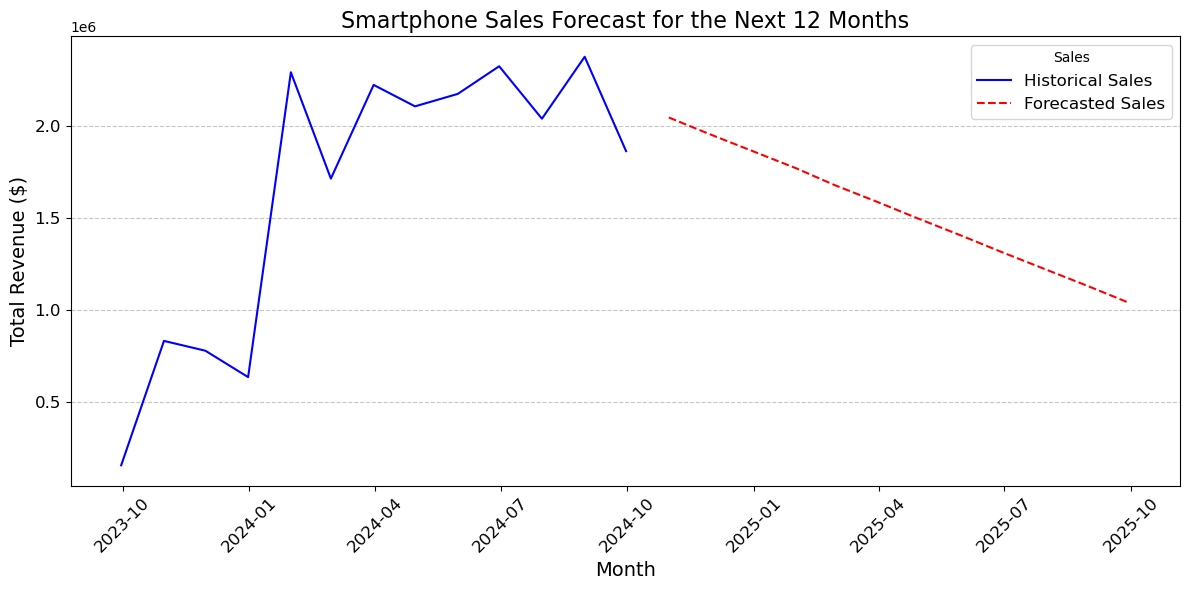

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

# Assuming sales_data is already loaded
# Step 1: Filter data for Smartphone purchases
smartphone_data = sales_data[sales_data['Product Type'] == 'Smartphone']

# Step 4: Visualization of demographics for Smartphone buyers

# Gender Distribution for Smartphone Buyers
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=smartphone_data, palette='viridis')
plt.title('Gender Distribution for Smartphone Buyers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution for Smartphone Buyers
plt.figure(figsize=(10, 6))
plt.hist(smartphone_data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Age Distribution for Smartphone Buyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Loyalty Membership Distribution for Smartphone Buyers
plt.figure(figsize=(8, 6))
sns.countplot(x='Loyalty Member', data=smartphone_data, palette='pastel')
plt.title('Loyalty Membership Distribution for Smartphone Buyers')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Count')
plt.show()

# Age vs Loyalty Membership for Smartphone Buyers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty Member', y='Age', data=smartphone_data, palette='Set2')
plt.title('Age vs Loyalty Membership for Smartphone Buyers')
plt.xlabel('Loyalty Member Status')
plt.ylabel('Age')
plt.show()

# Improved Histogram of Age by Gender
plt.figure(figsize=(10, 6))
plt.hist(sales_data[sales_data['Gender'] == 'Male']['Age'], bins=10, alpha=0.5, label='Male', color='blue', edgecolor='black')
plt.hist(sales_data[sales_data['Gender'] == 'Female']['Age'], bins=10, alpha=0.5, label='Female', color='pink', edgecolor='black')
plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# Sales Trends Analysis
# Convert 'Purchase Date' to datetime format
sales_data['Purchase Date'] = pd.to_datetime(sales_data['Purchase Date'])

# Group sales data by month and calculate total revenue
monthly_sales = sales_data.resample('M', on='Purchase Date')['Total Price'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Revenue Trends for Each Product Type
# Group sales data by Product Type and month, then calculate total revenue
product_monthly_sales = sales_data.groupby(['Product Type', pd.Grouper(key='Purchase Date', freq='M')])['Total Price'].sum().reset_index()

# Plot revenue trends for each product type
plt.figure(figsize=(14, 8))
sns.lineplot(data=product_monthly_sales, x='Purchase Date', y='Total Price', hue='Product Type', marker='o')
plt.title('Monthly Revenue Trends by Product Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Product Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Forecast Future Product Sales using Trends
# Forecast for Smartphone sales as an example
smartphone_sales = product_monthly_sales[product_monthly_sales['Product Type'] == 'Smartphone'].set_index('Purchase Date')['Total Price']

# Train the forecasting model using Exponential Smoothing (non-seasonal)
model = ExponentialSmoothing(smartphone_sales, trend='add').fit()

# Forecast the next 12 months
forecast = model.forecast(12)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(smartphone_sales.index, smartphone_sales.values, label='Historical Sales', color='blue')
plt.plot(forecast.index, forecast.values, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Smartphone Sales Forecast for the Next 12 Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Converting the 'Purchase Date' to a datetime format.
Grouping sales data by month to calculate total revenue.
Plotting the monthly sales trend to visualize revenue over tim

/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/opt/anaconda3/envs/condavenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


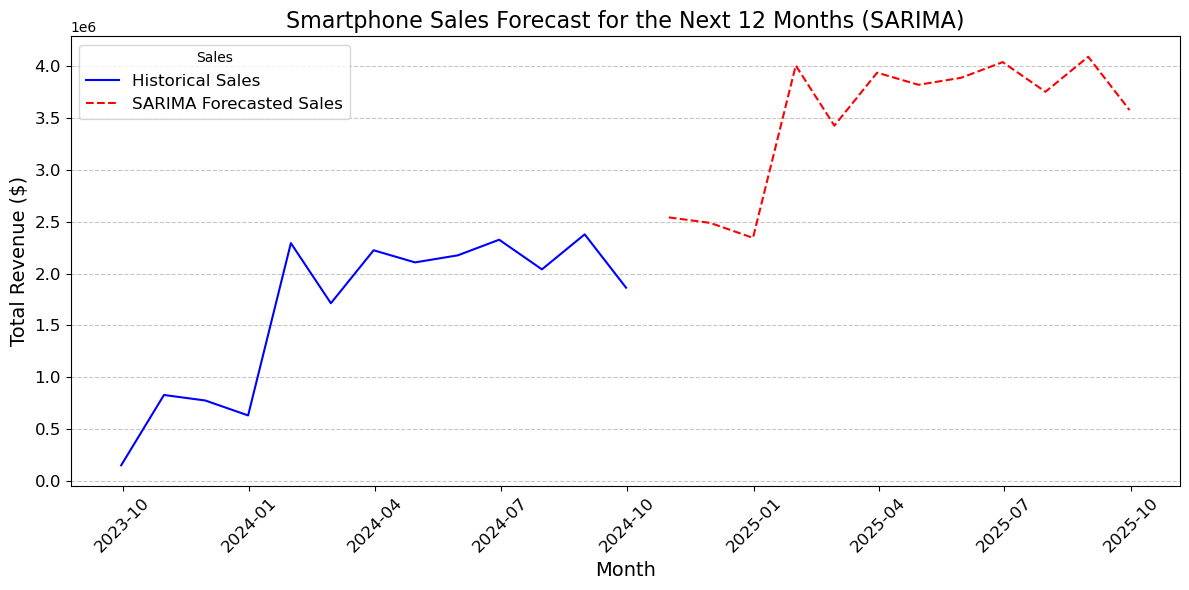

In [147]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model to the smartphone sales data
sarima_model = SARIMAX(smartphone_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Forecast the next 12 months
sarima_forecast = sarima_model.get_forecast(steps=12).predicted_mean

# Plot historical data and SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(smartphone_sales.index, smartphone_sales.values, label='Historical Sales', color='blue')
plt.plot(sarima_forecast.index, sarima_forecast.values, label='SARIMA Forecasted Sales', color='red', linestyle='--')
plt.title('Smartphone Sales Forecast for the Next 12 Months (SARIMA)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
